In [34]:
import os
setup_script = os.path.join(os.environ['ENV_JUPYTER_SETUPS_DIR'], 'setup_sci_env_basic.py')
%run $setup_script

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
from scipy.stats import norm, poisson
from scipy.optimize import minimize

# Likelihood

\begin{equation}
    \mathcal{L}_{comb}(\mathbf{x},\theta) = \prod^{N}_{i=1} \mathcal{L}(x_{i},\theta)
\end{equation}

\begin{equation}
    \ln \mathcal{L}_{comb}(\mathbf{x}, \theta) = \sum^{N}_{i=1} \ln \mathcal{L}(x_{i},\theta)
\end{equation}

## Maximum likelihood estimator:

\begin{equation}
    \hat{\theta} = \underset{\theta}{\text{argmax}} ~ \mathcal{L}(\theta,\mathbf{x})
\end{equation}

\begin{equation}
    \hat{\theta} = \underset{\theta}{\text{argmin}} ~ \left[ - \ln \mathcal{L}(\theta,\mathbf{x}) \right]
\end{equation}

Functions:
- `NLL(pars, x)` = $- 2 \ln \mathcal{L}(\theta, x)$
- `NLL_comb(pars, x)` = $- \sum_{i=1}^{N} 2 \ln \mathcal{L}(\theta, x_{i})$

Prototype NLL

In [31]:
def NLL_norm(pars, x):
    """Returns -2*ln*L"""
    mu = pars[1]
    sigma = pars[0]
    ll = -0.5 * np.log(2.0*np.pi) - np.log(sigma) - (x-mu)**2/(2.0*sigma**2)
    return - 2.0 * ll

Combined NLL

In [4]:
def NLL(pars, X, NLL_func):
    nll_sum = 0
    for xi in X:
        nll = NLL_func(pars, xi)
        nll_sum += nll
    return nll_sum

Conditional NLL

In [5]:
def NLL_cond(par_opt, par_fix, X, NLL_func):
    pars = (par_opt, par_fix)
    nll_sum = NLL(pars, X, NLL_func)
    return nll_sum

MLEs

In [6]:
def MLE(NLL, X, NLL_func, init_values, method='Nelder-Mead'):
    args = (X, NLL_func)
    m = minimize(fun=NLL, x0=init_values, args=args, method=method)
    return m

In [7]:
def MLE_cond(NLL_cond, X, NLL_func, par_fix, init_values, method='Nelder-Mead'):
    args = (par_fix, X, NLL_func)
    m = minimize(fun=NLL_cond, x0=init_values, args=args, method=method)
    return m

Generate a datasample

In [8]:
x_sample = norm.rvs(size=100, loc=5.0, scale=2.0)

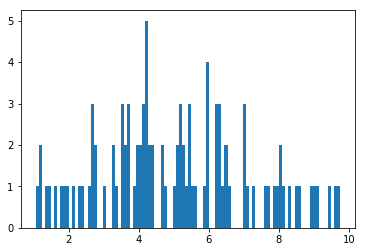

In [9]:
f,a = plt.subplots()
n, bins, patches = a.hist(x_sample, bins=100)

Parameter scan

In [10]:
x = np.linspace(4.0, 6.0, 100)
y = np.linspace(0.1, 3.0, 100)
X,Y = np.meshgrid(x,y)

In [11]:
Z = NLL((X,Y), x_sample, NLL_norm)

In [12]:
def plot_NLL(X,Y,Z):
    f,a = plt.subplots()
    
    pcm = a.pcolor(X, Y, Z, cmap='viridis_r', norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
    cb = f.colorbar(pcm, ax=a, extend='max')
    cb.set_label(r'$-2\ln \mathcal{L}$')
        
    min_index = np.argmin(Z)
    min_value = np.min(Z)
    a.scatter(X.flatten()[min_index], Y.flatten()[min_index], c='k', marker='x')
    
    a.contour(X,Y,Z, [min_value+1.0, min_value+4.0, min_value+9.0])
    
    label = "Min value: {:.2e}".format(min_value)
    a.text(0.2, 0.1, label, transform=a.transAxes)
    return f,a

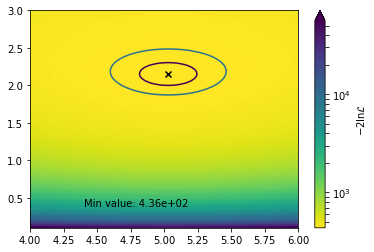

In [13]:
f,a = plot_NLL(X,Y,Z)

## MLE

In [32]:
MLE(NLL, X=x_sample, NLL_func=NLL_norm, init_values=(1.0, 1.0))

 final_simplex: (array([[ 2.14215032,  5.03056516],
       [ 2.14215496,  5.03065145],
       [ 2.14209662,  5.03059405]]), array([ 436.15001388,  436.15001388,  436.15001398]))
           fun: 436.15001387744286
       message: 'Optimization terminated successfully.'
          nfev: 95
           nit: 49
        status: 0
       success: True
             x: array([ 2.14215032,  5.03056516])

In [33]:
MLE_cond(NLL_cond, X=x_sample, NLL_func=NLL_norm, par_fix=5.0, init_values=(1.0))

 final_simplex: (array([[ 2.14238281],
       [ 2.14228516]]), array([ 436.17042761,  436.17042793]))
           fun: 436.17042760627652
       message: 'Optimization terminated successfully.'
          nfev: 34
           nit: 17
        status: 0
       success: True
             x: array([ 2.14238281])